In [ ]:
# PLAYER	Խաղացողի անունը
# YRS   	Քանի տարի է խաղացել (կարիերայի երկարություն)
# G     	Խաղերի քանակ (Games played)
# AB      Հարվածների փորձեր (At Bats)
# R       Վազքեր (Runs scored)
# H	      Հարվածների քանակ (Hits)
# 2B    	Երկու բազային հարվածների քանակ (Doubles)
# 3B	    Երեք բազային հարվածների քանակ (Triples)
# HR    	Home Run-ների քանակ
# RBI   	Վազքի բերման թվաքանակ (Runs Batted In)
# BB	    Bases on Balls (Walks)՝ խաղացողը քայլում է բազա
# SO    	Հարվածային սխալներ (Strikeouts)
# SB    	Գողացված բազաներ (Stolen Bases)
# CS    	Գողացված բազաներում ձախողումներ (Caught Stealing)
# BA    	Batting Average (Հարվածային միջին)
# HOF   	Hall of Fame՝ արդյոք խաղացողը Hall of Fame-ում է (0 կամ 1)

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
df = pd.read_csv('/content/500hits.csv',encoding='latin1')
df

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Jim Wynn,15,1920,6653,1105,1665,285,39,291,964,1224,1427,225,101,0.250,0
461,Jorge Posada,17,1829,6092,900,1664,379,10,275,1065,936,1453,20,21,0.273,0
462,Brady Anderson,15,1834,6499,1062,1661,338,67,210,761,960,1190,315,100,0.256,0
463,Cookie Rojas,16,1822,6309,714,1660,254,25,54,593,396,489,74,68,0.263,0


In [39]:
df = df.drop(columns=['PLAYER','CS'])
df

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,15,1920,6653,1105,1665,285,39,291,964,1224,1427,225,0.250,0
461,17,1829,6092,900,1664,379,10,275,1065,936,1453,20,0.273,0
462,15,1834,6499,1062,1661,338,67,210,761,960,1190,315,0.256,0
463,16,1822,6309,714,1660,254,25,54,593,396,489,74,0.263,0


In [40]:
X = df.iloc[:,:13]
y = df.iloc[:,13]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1])

In [45]:
model.score(X_test,y_test)

0.8376068376068376

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

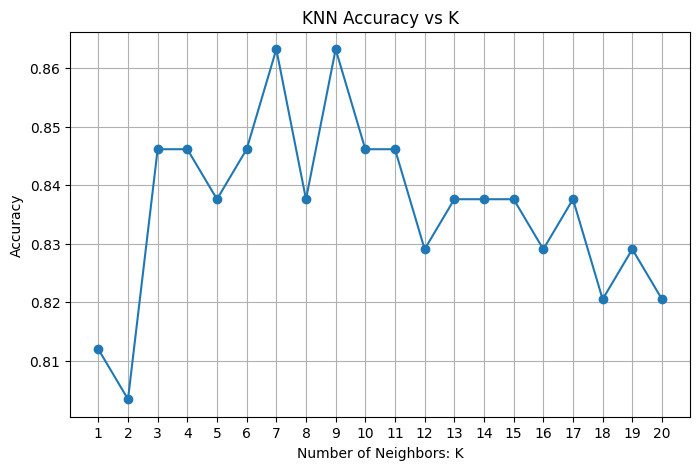

In [48]:
accuracies = []
k_range = range(1,21)

for i in k_range:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  acc = model.score(X_test,y_test)
  accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.plot(k_range,accuracies,marker='o')
plt.title('KNN Accuracy vs K')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_range);


In [49]:
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[73  1]
 [18 25]]


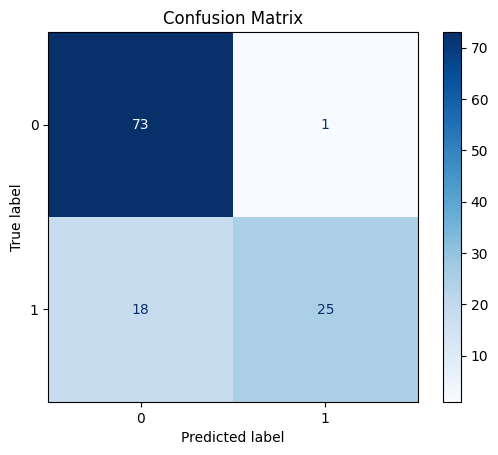

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [55]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.99      0.88        74
           1       0.96      0.58      0.72        43

    accuracy                           0.84       117
   macro avg       0.88      0.78      0.80       117
weighted avg       0.86      0.84      0.83       117



In [56]:
print(model.n_samples_fit_)

348
